# Итоговая работа.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

from sklearn.metrics import pairwise_distances

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [5]:
x = sym.Symbol('x')
some_function = sym.tan(sym.sin(x) + sym.cos(2*x+3))**2

diff_1 = sym.diff(some_function, x)

diff_1


2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [6]:
# Значение первой производной в точке х = 1

diff_1.subs(x,1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

## Задание 2

Дан объект в $2D$ пространстве

(-200, 200)

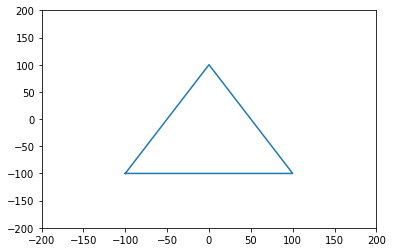

In [47]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)


(-200, 400)

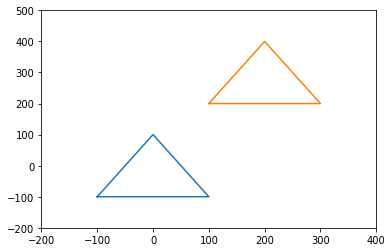

In [61]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

# Смещение на (200, 300)
B = np.array(A) + np.array([200,300,0])


# Изобразим первоначальный объект
x = A[:,0]
y = A[:,1]
plt.plot(x, y)

# Изобразим объект после смещения
x = B[:,0]
y = B[:,1]
plt.plot(x, y)

plt.ylim([-200, 500])
plt.xlim([-200, 400]) 

(-200, 500)

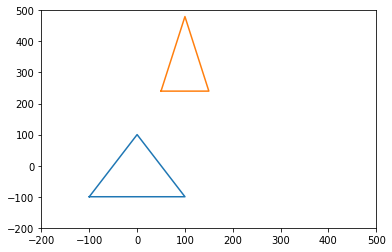

In [66]:
# Матрица для масштабирования
TransformArray_2 = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])


# Применим матрицу для масштабирования
result = []
for i in B:
    result.append(TransformArray_2@i)



# Изобразим первоначальный объект
x = A[:,0]
y = A[:,1]
plt.plot(x, y)

# Изобращим объект, который получили в результате преобразования
r = np.array(result)
x2 = r[:,0]
y2 = r[:,1]
plt.plot(x2, y2)

plt.ylim([-200, 500])
plt.xlim([-200, 500]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [8]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [9]:
# Собственное значение

np.linalg.eigvals(m)

array([ 3., -1.])

In [10]:
# Собственные векторы

np.linalg.eig(m)[1]

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [11]:
# Приведем векторы к "красивому" виду

vecs = np.transpose(np.linalg.eig(m)[1])

vecs

array([[ 0.89442719,  0.4472136 ],
       [-0.89442719,  0.4472136 ]])

In [12]:
# То есть (2, 1)

vecs[0]/0.4472136

array([1.99999998, 0.99999999])

In [13]:
# То есть (-2, 1)

vecs[1]/0.4472136

array([-1.99999998,  0.99999999])

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
### YOUR CODE HERE

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [16]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [26]:
# Для решения применим pairwise_distances и используем метрику "cosine"

distances = pairwise_distances(raitings, metric='cosine')
distances

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [45]:

# Создадим пустой словарь куда будем добавлять по очереди пары самых похожих пользователей
similar_users_dict = {}


# Циклом пройдемся по всем значениям из distances и будем искать наименьшие значения метрики (кроме 0) и будем записывать
# в словарь к какому пользователю относится это значение
for i in range(len(distances)):
    similar_user = 1
    for user_num in range(10):
        # Пользователь со значением 0 - это и есть сам пользователь для которого ищем пару
        # Поэтому его не учитываем
        if distances[i][user_num] == 0: 
            pass 
        else:
            if distances[i][user_num] < similar_user: # Ищем пользователя с самым низким косинусным значением 
                similar_user = distances[i][user_num]
                similar_users_dict[i + 1]  = user_num + 1 # Добавляем 1 чтобы в словаре пользователи имели номера 1-10, а не 0-9

# Получаем вот такой словарь
print(similar_users_dict)
        

{1: 9, 2: 5, 3: 10, 4: 10, 5: 9, 6: 10, 7: 4, 8: 6, 9: 1, 10: 3}


In [46]:

# Напечатаем получившиеся пары

for user in similar_users_dict:
    print('Пользователь №{} больше всего похож на Пользователя №{}'.format(user, similar_users_dict[user]))



Пользователь №1 больше всего похож на Пользователя №9
Пользователь №2 больше всего похож на Пользователя №5
Пользователь №3 больше всего похож на Пользователя №10
Пользователь №4 больше всего похож на Пользователя №10
Пользователь №5 больше всего похож на Пользователя №9
Пользователь №6 больше всего похож на Пользователя №10
Пользователь №7 больше всего похож на Пользователя №4
Пользователь №8 больше всего похож на Пользователя №6
Пользователь №9 больше всего похож на Пользователя №1
Пользователь №10 больше всего похож на Пользователя №3
